In [8]:
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import numpy as np
import cv2

image shape: (128, 128, 368)
data type: float64


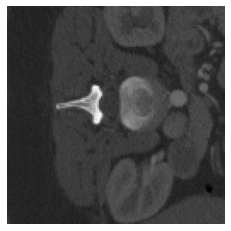

label shape: (128, 128, 368)
data type: float64


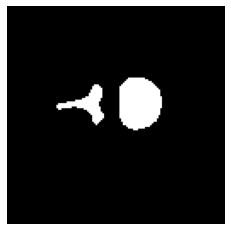

max value in label: 18.0


In [2]:
# 读取NIfTI.gz文件
nii_image = nib.load('./dataset/Spineweb_dataset15/case1.nii.gz')

# 获取图像数据
image_data = nii_image.get_fdata()

# 输出图像数据的形状和数据类型
print("image shape:", image_data.shape)
print("data type:", image_data.dtype)

# output a single layer of the CT scan
layer_index = 100
layer_data = image_data[:,:,layer_index]

plt.imshow(layer_data,cmap='gray')
plt.axis('off')
plt.show()

# show the label information of the single layer
# load the nii.gz file 读取NIfTI.gz文件
nii_label = nib.load('./dataset/Spineweb_dataset15/case1_label.nii.gz')

# acquire the data of image 获取图像数据
label_data = nii_label.get_fdata()

# output the shape and data type 输出图像数据的形状和数据类型
print("label shape:", label_data.shape)
print("data type:", label_data.dtype)

layer_label = label_data[:,:,layer_index]
plt.imshow(layer_label,cmap="gray")
plt.axis('off')
plt.show()
print("max value in label:",label_data.max())

[[ -98. -108. -113. ... -253.  -70.  -77.]
 [ -89. -101. -105. ...  -65.  -81.  -83.]
 [-114. -105.  -91. ... -105.  -97.  -79.]
 ...
 [ -64.  -84. -122. ...    5.  -65. -132.]
 [ -42.  -69. -100. ...   29.  -30.  -93.]
 [ -26.  -98. -109. ...   16.   20.   -1.]] (128, 128)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (128, 128)
[[-106. -104. -128. ... -125.  -75.  -76.]
 [-104. -108.  -96. ...  -55.  -94.  -91.]
 [-100.  -89.  -97. ... -113. -110.  -72.]
 ...
 [  -6.  -67. -121. ...   66.   21.  -48.]
 [  -3.  -62.  -99. ...   36.   68.  -55.]
 [  -5.  -70. -102. ...   16.   60.   42.]] (128, 128)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (128, 128)
[[ -90.  -93. -116. ...  -59.  -80.  -92.]
 [-113.  -98.  -86. ...  -66. -109.  -74.]
 [ -99.  -88. -104. ... -111. 

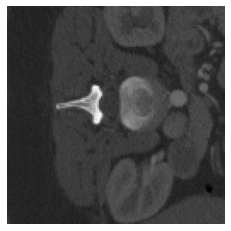

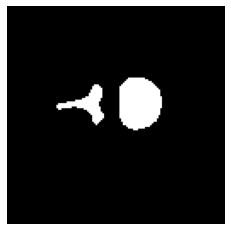

In [15]:
image_paths = []
label_paths = []
#add the paths to the lists
for i in range(1,11):
    image_path = "./dataset/Spineweb_dataset15/case"+str(i)+".nii.gz"
    label_path = "./dataset/Spineweb_dataset15/case"+str(i)+"_label.nii.gz"
    image_paths.append(image_path)
    label_paths.append(label_path)

target_size = (128,128)

# preprocess the dataset, put all image and label together
image_list = []
label_list = []
# get the storage file path
processed_path = "./dataset/Spineweb_dataset15/processed/"
for i in range(0,len(image_paths)):
    # load the images and labels
    image = nib.load(image_paths[i])
    label = nib.load(label_paths[i])
    image_data = image.get_fdata()  # the size of the CT image is different
    label_data = label.get_fdata()      # dataType: ndarray
    label_data = np.where(label_data!=0,1,label_data)   #convert the !0 data in label_data into 1
    # get each dimension
    (x,y,z) = image_data.shape
    # get the data in z dimension
    for j in range(z):
        image_z = image_data[:,:,j]
        label_z = label_data[:,:,j]
        print(image_z,image_z.shape)
        print(label_z,label_z.shape)
        combined_data = np.array([image_z,label_z])
        # image_path_temp = processed_path+str(i)+"_"+str(j)+".jpg"
        # cv2.imwrite(image_path_temp,image_z)
        path_temp = processed_path+str(i)+"_"+str(j)+".npy"
        np.save(path_temp,combined_data)
    
# print(label_list.shape)
# print(image_list)
# spine_dataset = SpineWeb15(image_paths=image_paths,label_paths=label_paths)
# image_data, label_data = spine_dataset[0]

# layer_data = cv2.imread(processed_path+"0_100.jpg")
layer_data = np.load(processed_path+"0_100.npy")[0]
layer_label = np.load(processed_path+"0_100.npy")[1]
plt.imshow(layer_data,cmap="gray")
plt.axis('off')
plt.show()
plt.imshow(layer_label,cmap="gray")
plt.axis('off')
plt.show()

